In [1]:
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import image
import glob
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [2]:
# load image as pixel array
#data = image.imread('metal_moderate_001_new.jpg')

directoryGlass = 'C:/Users/Nida\Desktop/Lectures/Pattern/Final/FMD/image/glass/'
directoryMetal = 'C:/Users/Nida\Desktop/Lectures/Pattern/Final/FMD/image/metal/'
directoryGlassMask = 'C:/Users/Nida/Desktop/Lectures/Pattern/Final/FMD/mask/glass/'
directoryMetalMask = 'C:/Users/Nida/Desktop/Lectures/Pattern/Final/FMD/mask/metal/'

generalDataX = []
generalDataY = [] # 0 for glass, 1 for metal
generalDataMask = [] # Mask images 

# read to-be-classified images 
for filename in glob.glob(directoryGlass+'*.jpg'):
    generalDataX.append(np.array(cv2.imread(filename)))
    generalDataY.append(0)#glass
for filename in glob.glob(directoryMetal+'*.jpg'):
    generalDataX.append(np.array(cv2.imread(filename)))
    generalDataY.append(1)#metal
# read mask images
for filename in glob.glob(directoryGlassMask+'*.jpg'):
    generalDataMask.append(np.array(cv2.imread(filename)))
for filename in glob.glob(directoryMetalMask+'*.jpg'):
    generalDataMask.append(np.array(cv2.imread(filename)))

maskedDataX = []
for i in range(len(generalDataX)):
    # Mask input image with binary mask
    maskedDataX.append(np.array(cv2.bitwise_and(generalDataX[i], generalDataMask[i])))
    # cv2.imshow('image', generalDataX[i])
    # cv2.imshow('mask', generalDataMask[i])
    # cv2.imshow('result', result)
    # cv2.waitKey()

numImages = np.array(maskedDataX).shape[0]
generalDataXFlattened = np.array([maskedDataX[i].flatten() for i in range(0,numImages)])

print(len(generalDataX[0][0]), len(generalDataX[0][:,0]), len(generalDataX[0][0][0]))
print(len(generalDataX))
# split dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(generalDataXFlattened, generalDataY, test_size=0.33, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

200
200
512 384 3
200
134 66 134 66


In [39]:
def plotGraph(X_reduced, whichPrin):
    #1st and 2nd principal graphic plot
    X_reduced_sub = np.array([X_reduced[:,0] , X_reduced[:,whichPrin]]).T
    new_coordinates = np.vstack((X_reduced_sub.T, y_train)).T
    dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', str(whichPrin+1)+'._principal', 'label'))
    print(dataframe.head())
    sn.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, '1st_principal', str(whichPrin+1)+'._principal').add_legend()
    plt.show()

   1st_principal  2._principal  label
0    6722.173083 -18435.053404    0.0
1   39173.358197  24458.332535    1.0
2  -26109.866822  16523.392469    0.0
3   -3309.750232  -9067.763427    1.0
4   20166.469855  10872.846324    0.0
C:\Users\Nida\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


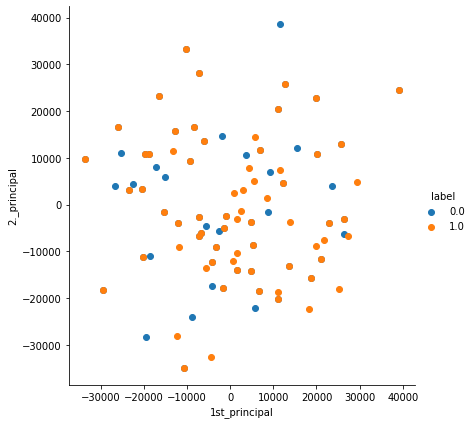

In [55]:
pca = PCA(n_components=80)
pca.fit(X_train)
X_reduced = pca.transform(X_train)
plotGraph(X_reduced, 1)

   1st_principal  2._principal  label
0    6722.171328 -18435.063912    0.0
1   39173.355186  24458.307143    1.0
2  -26109.864642  16523.392442    0.0
3   -3309.755392  -9067.779750    1.0
4   20166.448776  10872.773822    0.0
C:\Users\Nida\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


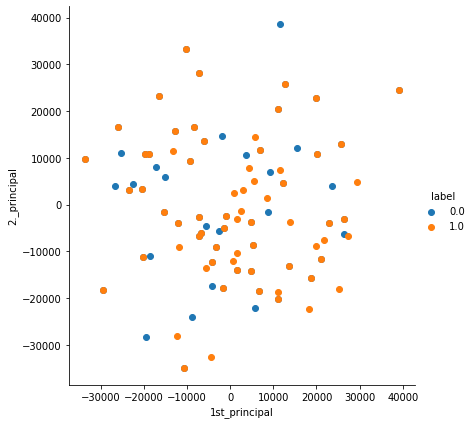

In [53]:
kpca = KernelPCA(n_components=90, kernel="poly")
kpca.fit(X_train)
X_reduced = pca.transform(X_train)
plotGraph(X_reduced, 1)

In [56]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_reduced, y_train)
print("Cross validation in progress...")
X_test_reduced = pca.transform(X_test)
scores = cross_val_score(clf, X_test_reduced, y_test, cv=5)
print("Scores : ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation in progress...
Scores :  [0.42857143 0.30769231 0.61538462 0.30769231 0.38461538]
0.41 accuracy with a standard deviation of 0.11
